# Principal Component Analysis

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Step 1 - Dataset creation

In [2]:
# Sample set no. 1
mu_vec1 = np.array([0,0,0]) # sample mean
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]]) # sample covariance
sample_set1 = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

In [3]:
print("Sample set no.1 - matrix " + str(sample_set1.shape) + ":\n" + str(sample_set1) + "\n")

Sample set no.1 - matrix (3, 20):
[[ 1.42840446 -0.53116789  1.1913428   0.94010081  0.80201424 -0.555519
   1.76322539  0.55613154 -1.45903249  1.00405498  0.51579071 -0.28156549
  -0.28526064 -1.65399333  1.93788166  1.4401364  -0.23482847 -0.40661195
  -0.58788608  1.06917421]
 [ 0.36727562 -1.10183113 -0.81384723 -0.79647818  0.0394378   0.17963336
  -0.07924711  1.06254246 -0.49681928 -0.48343398 -1.38299358  0.67187181
   2.12447615 -0.47019719 -0.61051756 -1.34047092  0.74723781 -0.06543037
  -1.72020758  1.57085077]
 [ 0.29318499 -0.49409336 -1.42092064  1.21441312 -0.57245245  1.78629082
  -1.52644024 -0.79642079 -1.25301422 -0.63552394 -1.05094863 -0.3430643
  -0.14467907 -0.83238836 -0.24296331  2.64880012 -1.21473027  0.59780165
   0.20402645 -3.17593392]]



In [4]:
# Checking if mean of set1 is close to 0 according to mu_vec1
np.mean(sample_set1)

-0.048413546515011001

In [5]:
# Sample set no. 2
mu_vec2 = np.array([1,1,1]) # sample mean
cov_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]]) # sample covariance
sample_set2 = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

In [6]:
print("Sample set no.2 - matrix " + str(sample_set2.shape) + ":\n" + str(sample_set2))

Sample set no.2 - matrix (3, 20):
[[  1.09818342e+00   1.88007526e+00   5.59890071e-02   7.85389593e-01
   -6.91466992e-01  -8.02322511e-01   5.26635763e-01   1.36434111e+00
   -2.28843232e-01   1.79432262e+00   1.59921613e+00   1.16161310e+00
    2.17710227e+00   2.24685945e+00   1.49485326e+00   1.05293169e+00
    1.67736734e+00   1.50757277e+00   2.37199929e-01  -1.31400016e+00]
 [  2.34910043e-02   1.32892994e+00   2.44969075e+00   1.21948499e-03
    1.12828715e-02   9.94990106e-01   1.44047205e+00  -6.36893014e-01
   -6.59322044e-02  -7.95856668e-01   3.06059252e+00   1.43974204e+00
    1.07803503e+00   7.01529332e-01   3.35583707e+00   2.64208231e+00
    7.72948781e-01   2.36512357e+00   7.68690060e-01   1.77731566e+00]
 [  1.55016206e+00   2.76629647e+00   3.84384498e-01   3.68189873e-01
    1.47117682e+00   1.39868526e+00   1.95240092e+00   2.05272401e+00
    9.85109606e-01  -6.79555027e-01   6.06033930e-01   1.88462522e+00
    1.95299569e+00   1.16494980e+00   2.09010473e+00  

In [7]:
# Checking if mean of set2 is close to 1 according to mu_vec2
np.mean(sample_set2)

1.1467729081836886

### Step 2 - Plot Data

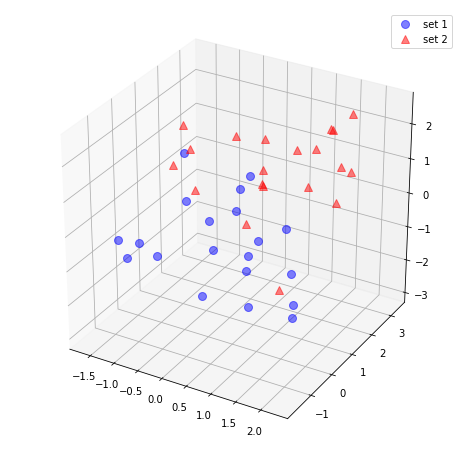

In [8]:
# Create Figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10

# Draw points of both data sets
ax.plot(sample_set1[0,:], sample_set1[1,:], sample_set1[2,:], 
        'o', markersize=8, color='blue', alpha=0.5, label="set 1")

ax.plot(sample_set2[0,:], sample_set2[1,:], sample_set2[2,:], 
        '^', markersize=8, color='red', alpha=0.5, label="set 2")

# Show legend
ax.legend(loc='upper right')
plt.show()

### Step 3 - merge the data into one dataset

In [9]:
# Merging two sample sets into one
all_samples = np.concatenate((sample_set1, sample_set2), axis=1)

In [10]:
print("All_samples - matrix " + str(all_samples.shape) + ":\n" + str(all_samples))

All_samples - matrix (3, 40):
[[  1.42840446e+00  -5.31167892e-01   1.19134280e+00   9.40100811e-01
    8.02014240e-01  -5.55519002e-01   1.76322539e+00   5.56131543e-01
   -1.45903249e+00   1.00405498e+00   5.15790713e-01  -2.81565493e-01
   -2.85260638e-01  -1.65399333e+00   1.93788166e+00   1.44013640e+00
   -2.34828470e-01  -4.06611953e-01  -5.87886078e-01   1.06917421e+00
    1.09818342e+00   1.88007526e+00   5.59890071e-02   7.85389593e-01
   -6.91466992e-01  -8.02322511e-01   5.26635763e-01   1.36434111e+00
   -2.28843232e-01   1.79432262e+00   1.59921613e+00   1.16161310e+00
    2.17710227e+00   2.24685945e+00   1.49485326e+00   1.05293169e+00
    1.67736734e+00   1.50757277e+00   2.37199929e-01  -1.31400016e+00]
 [  3.67275624e-01  -1.10183113e+00  -8.13847233e-01  -7.96478178e-01
    3.94378047e-02   1.79633363e-01  -7.92471059e-02   1.06254246e+00
   -4.96819277e-01  -4.83433984e-01  -1.38299358e+00   6.71871815e-01
    2.12447615e+00  -4.70197188e-01  -6.10517557e-01  -1.34

### Step 4 - mean normalization of each point/feature

Given data:

\begin{equation*}
 x_1, x_2, x_3, ..., x_m
\end{equation*}


Calculate data mean:

\begin{equation*}
\mu_k = \frac{1}{m}\sum_{i=1}^mx^{(i)}_k
\end{equation*}

Where:
- i - data index
- j - data row (depending on dimension)
- m - num of all data samples

Apply to each sample in data set:

\begin{equation*}
x^{(i)}_k = x_k - \mu_k
\end{equation*}  

In [11]:
# Calculating mean of each data dimension
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

# Creating mean vector
mean_vec = np.array([[mean_x], [mean_y], [mean_z]])

In [12]:
print(mean_vec.shape)

(3, 1)


In [13]:
# Creating mean vector
mean_vec = np.array([[mean_x], [mean_y], [mean_z]])

In [14]:
print(mean_vec)

[[ 0.60688529]
 [ 0.50287856]
 [ 0.53777519]]


In [15]:
# Creating matrix of same size as all samples
all_samples_normalized = np.zeros(all_samples.shape)

# # Subtracting dimension mean from each data dimension row
all_samples_normalized = all_samples - mean_vec

In [16]:
print("All_samples_normalized - matrix " + str(all_samples_normalized.shape) 
      + ":\n" + str(all_samples_normalized))

All_samples_normalized - matrix (3, 40):
[[ 0.82151917 -1.13805318  0.58445751  0.33321552  0.19512895 -1.16240429
   1.1563401  -0.05075375 -2.06591778  0.39716969 -0.09109458 -0.88845079
  -0.89214593 -2.26087862  1.33099637  0.83325111 -0.84171376 -1.01349724
  -1.19477137  0.46228892  0.49129813  1.27318997 -0.55089628  0.1785043
  -1.29835228 -1.4092078  -0.08024953  0.75745582 -0.83572852  1.18743733
   0.99233084  0.5547278   1.57021698  1.63997416  0.88796797  0.4460464
   1.07048205  0.90068748 -0.36968536 -1.92088545]
 [-0.13560294 -1.60470969 -1.31672579 -1.29935674 -0.46344076 -0.3232452
  -0.58212567  0.5596639  -0.99969784 -0.98631254 -1.88587214  0.16899325
   1.62159759 -0.97307575 -1.11339612 -1.84334948  0.24435925 -0.56830894
  -2.22308614  1.06797221 -0.47938756  0.82605138  1.94681219 -0.50165908
  -0.49159569  0.49211155  0.93759349 -1.13977157 -0.56881076 -1.29873523
   2.55771396  0.93686348  0.57515647  0.19865077  2.85295851  2.13920375
   0.27007022  1.862245

In [17]:
# Checking if every feature has 0 mean now
norm_mean_x = np.mean(all_samples_normalized[0,:])
norm_mean_y = np.mean(all_samples_normalized[1,:])
norm_mean_z = np.mean(all_samples_normalized[2,:])

In [18]:
print(round(norm_mean_x), round(norm_mean_y), round(norm_mean_z))

-0.0 -0.0 0.0


### Step 5 - Calculating Covariance Matrix

#### a) solution 1

Covariance Matrix:

\begin{equation*}
\sum = \frac{1}{m}\sum_{i=1}^m(x^{(i)})(x^{(i)})^T
\end{equation*}

Where:
- i - data index
- m - num of all data samples

In [19]:
cov_mat = (1/all_samples_normalized.shape[1]) * (all_samples_normalized.dot(all_samples_normalized.T))

In [20]:
print("Covariance matrix: \n" + str(cov_mat))

Covariance matrix: 
[[ 1.09754549  0.19586685  0.26247985]
 [ 0.19586685  1.56477452  0.46412605]
 [ 0.26247985  0.46412605  1.86004826]]


#### b) solution 2

We can use numpy to calculate Covariance Matrix. Result will be slightly difference. Numpy uses scaling factor **(1/m - 1)** instead of **(1/m)**. Eigenvalues will be slightly different but eigenvectors will be the same thus reusult of both solutions will be the same in the end.

In [21]:
cov_mat = np.cov(all_samples)

In [22]:
print("Covariance matrix: \n" + str(cov_mat))

Covariance matrix: 
[[ 1.12568769  0.20088908  0.2692101 ]
 [ 0.20088908  1.60489694  0.47602672]
 [ 0.2692101   0.47602672  1.90774181]]


### Step 6 - compute eigenvectors and eigenvalues

- What are eigen values and eigen vectors: http://setosa.io/ev/eigenvectors-and-eigenvalues/
- How to calculate eigen values and eigen vectors: http://www.sosmath.com/matrix/eigen1/eigen1.html

In [23]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [24]:
print("Eigenvalues: \n" + str(eig_val))

Eigenvalues: 
[ 2.34813994  1.03335391  1.25683259]


In [25]:
print("Eigenvectors: \n" + str(eig_vec))

Eigenvectors: 
[[ 0.26494747  0.96417112 -0.01329953]
 [ 0.56982482 -0.16768062 -0.80447677]
 [ 0.77788335 -0.20556569  0.5938352 ]]


### Step 7 - Create eigenpairs and sort in descending order

In [26]:
# Create tuples, makes vector vals positive
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

In [27]:
eig_pairs

[(2.3481399424444591, array([ 0.26494747,  0.56982482,  0.77788335])),
 (1.0333539063807353, array([ 0.96417112, -0.16768062, -0.20556569])),
 (1.2568325857517089, array([-0.01329953, -0.80447677,  0.5938352 ]))]

In [28]:
# Sort (eigenvalues, eigenvectors) pairs with descending order
eig_pairs.sort()
eig_pairs.reverse()

In [29]:
eig_pairs

[(2.3481399424444591, array([ 0.26494747,  0.56982482,  0.77788335])),
 (1.2568325857517089, array([-0.01329953, -0.80447677,  0.5938352 ])),
 (1.0333539063807353, array([ 0.96417112, -0.16768062, -0.20556569]))]

### Step 8 - create matrix of eigenvectors

Currently our data is 3D. We have 3x3 matrix of eigenvectors. Depending on number of rows we pick - we can reduce dimensionality of our data.

From 3D to 2D - if we pick 2 rows

In [30]:
matrix_w2d = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1))).T

In [31]:
matrix_w2d

array([[ 0.26494747,  0.56982482,  0.77788335],
       [-0.01329953, -0.80447677,  0.5938352 ]])

From 3D to 1D - if we pick 1 row

In [32]:
matrix_w1d = np.hstack((eig_pairs[0][1].reshape(3,1))).T

In [33]:
matrix_w1d

array([ 0.26494747,  0.56982482,  0.77788335])

### Step 9 - Reduce data dimension

In [34]:
reduced_2d = matrix_w2d.dot(all_samples)

In [35]:
print(reduced_2d.shape)

(2, 40)


In [36]:
reduced_1d = matrix_w1d.dot(all_samples)

In [37]:
print(reduced_1d.shape)

(40,)


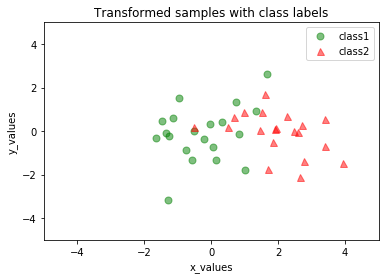

In [38]:
plt.plot(reduced_2d[0,0:20], reduced_2d[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(reduced_2d[0,20:40], reduced_2d[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()